# Supervised Machine Learning Models for Prediction of COVID‐19 Infection using Epidemiology Dataset

## Data Preprocessing

In [211]:
#import library:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# import data:
source_file="mexico_covid19_en.csv"
dataset=pd.read_csv(source_file)
# take useful Feature and target
data=pd.DataFrame(dataset,columns=['Age','Sex','Pneumonia','Diabetes','Asthma','Hypertension','CVDs','Obesity','CKDs','Tobacco','Result'])
# print(data)
# in original 1=female 2=male
# temp: 3=female, 2=male
data.loc[data['Sex']==1,'Sex']=3

# in this project, 0=female, 1=male
data.loc[data['Sex']==3,'Sex']=0
data.loc[data['Sex']==2,'Sex']=1

# orignal 1=positive 2=negative
#now 1=positive 0=negative
data.loc[data['Pneumonia']==2,'Pneumonia']=0
data.loc[data['Diabetes']==2,'Diabetes']=0
data.loc[data['Asthma']==2,'Asthma']=0
data.loc[data['Hypertension']==2,'Hypertension']=0
data.loc[data['CVDs']==2,'CVDs']=0
data.loc[data['Obesity']==2,'Obesity']=0
data.loc[data['CKDs']==2,'CKDs']=0
data.loc[data['Tobacco']==2,'Tobacco']=0
data.loc[data['Result']==2,'Result']=0
data


,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,CVDs,Obesity,CKDs,Tobacco,Result
0,74,1,0,1,0,1,0,1,0,0,0
1,71,0,0,1,0,1,0,1,0,1,0
2,50,1,1,0,0,0,0,0,0,0,1
3,25,0,0,0,0,0,0,1,0,0,1
4,28,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
263002,39,1,0,0,0,0,0,0,0,0,1
263003,53,0,1,1,0,0,0,1,0,0,1
263004,65,0,0,1,0,1,0,0,1,0,1
263005,71,1,1,0,0,1,0,0,0,0,1


### Data split

In [212]:
features=data.iloc[:,0:10]
labels=data["Result"]
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.20)

print(features.columns.values)

['Age' 'Sex' 'Pneumonia' 'Diabetes' 'Asthma' 'Hypertension' 'CVDs'
 'Obesity' 'CKDs' 'Tobacco']


## Paper 3' models:

### Model 1: Logistic Regression

In [213]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

lg_pred=lg.predict(x_test)
# lgACC=accuracy_score(y_true=y_test,y_pred=lg_pred)
# print("The Accuracy score for LG is: ")
# print(lgACC)
cm=confusion_matrix(y_true=y_test,y_pred=lg_pred)
# cm_df = pd.DataFrame(cm, 
#             columns = ['Predicted Negative', 'Predicted Positive'],
#             index = ['Actual Negative', 'Actual Positive'])
# cm_df

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

# Accuracy = (TP + TN) / All Predictions
lgAcc=(float (TP+TN) / float(TP + TN + FP + FN))
# Sensitivity = TP / (FN + TP)
lgSen=(TP / float(TP + FN))
# Specificity = TN / (TN + FP)
lgSpe=TN / (TN + FP)

print("The Accuracy score for LG is: ")
print(lgAcc)
print("The Sensitivity score for LG is: ")
print(lgSen)
print("The Specificity score for LG is: ")
print(lgSpe)



The Accuracy score for LG is: 
0.6460590852058857
The Sensitivity score for LG is: 
0.2554230994723471
The Specificity score for LG is: 
0.8948776996327877


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 2: Naive Bayes

In [214]:
nb=GaussianNB()
nb.fit(x_train,y_train)
# nbACC=nb.score(x_test,y_test)
# print("The Accuracy score for NB is: ")
# print(nbACC)

nb_pred=nb.predict(x_test)
cmnb=confusion_matrix(y_true=y_test,y_pred=nb_pred)

TPnb = cmnb[1][1]
TNnb = cmnb[0][0]
FPnb = cmnb[0][1]
FNnb = cmnb[1][0]

# Accuracy = (TP + TN) / All Predictions
nbAcc=(float (TPnb+TNnb) / float(TPnb + TNnb + FPnb + FNnb))
# Sensitivity = TP / (FN + TP)
nbSen=(TPnb / float(TPnb + FNnb))
# Specificity = TN / (TN + FP)
nbSpe=TNnb / (TNnb + FPnb)

print("The Accuracy score for nb is: ")
print(nbAcc)
print("The Sensitivity score for nb is: ")
print(nbSen)
print("The Specificity score for nb is: ")
print(nbSpe)


The Accuracy score for nb is: 
0.6121060035740086
The Sensitivity score for nb is: 
0.010211061168653508
The Specificity score for nb is: 
0.9954876454845335


### 3. Decision Tree (The one we choose for the report)

In [246]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_pred=dt.predict(x_test)
cmdt=confusion_matrix(y_true=y_test,y_pred=dt_pred)
print(cmdt)

TPdt = cmdt[1][1]
TNdt = cmdt[0][0]
FPdt = cmdt[0][1]
FNdt = cmdt[1][0]

# Accuracy = (TP + TN) / All Predictions
dtAcc=(float (TPdt+TNdt) / float(TPdt + TNdt + FPdt + FNdt))
# Sensitivity = TP / (FN + TP)
dtSen=(TPdt / float(TPdt + FNdt))
# Specificity = TN / (TN + FP)
dtSpe=TNdt / (TNdt + FPdt)

print("The Accuracy score for DT is: ")
print(dtAcc)
print("The Sensitivity score for DT is: ")
print(dtSen)
print("The Specificity score for DT is: ")
print(dtSpe)


[[28038  4096]
 [14560  5908]]
The Accuracy score for DT is: 
0.6453366792137181
The Sensitivity score for DT is: 
0.28864569083447333
The Specificity score for DT is: 
0.8725337648596502


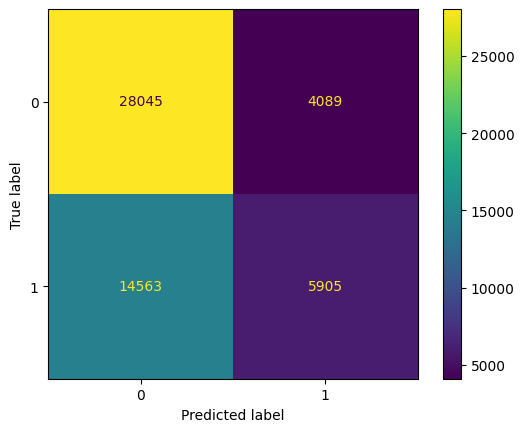

In [216]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmdt)
disp.plot()

### Visulazition of Decision tree (too slow, we cancled it)

In [217]:
# from sklearn.tree import plot_tree

# fig = plt.figure(figsize=(15, 10))
# plot_tree( dt,feature_names=features.columns.values ,
#           class_names="Result", 
#           filled=True, impurity=True, 
#           rounded=True)

## My model: Puposed Modification

## Data preprocessing (did not use in final)

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


x_stand=preprocessing.scale(x_train)
x_norm=preprocessing.normalize(x_train,norm='l2')
minmax_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x_minmax=minmax_scaler.fit_transform(x_train)
max_abs=preprocessing.MaxAbsScaler()
x_maxab=max_abs.fit_transform(x_train)

x_maxab

array([[0.34166667, 0.        , 0.01010101, ..., 0.01020408, 0.        ,
        0.        ],
       [0.49166667, 0.        , 0.01010101, ..., 0.01020408, 0.        ,
        0.        ],
       [0.25833333, 1.        , 0.01010101, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15833333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.325     , 0.        , 0.        , ..., 0.01020408, 0.        ,
        0.        ],
       [0.39166667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Random Forest

In [219]:

# for i in range(1,15,1):
rm=RandomForestClassifier(n_estimators=75,max_depth=11, min_samples_leaf=3 , min_samples_split=2 ,max_features="log2" ,random_state=90)
rm.fit(x_train,y_train);
rm_pred=rm.predict(x_test)
cmrm=confusion_matrix(y_true=y_test,y_pred=rm_pred)
TPrm = cmrm[1][1]
TNrm = cmrm[0][0]
FPrm = cmrm[0][1]
FNrm = cmrm[1][0]

# Accuracy = (TP + TN) / All Predictions
rmAcc=(float (TPrm+TNrm) / float(TPrm + TNrm + FPrm + FNrm))
# Sensitivity = TP / (FN + TP)
rmSen=(TPrm / float(TPrm + FNrm))
# Specificity = TN / (TN + FP)
rmSpe=TNrm / (TNrm + FPrm)
print("The Accuracy score for RM is: ")
print(rmAcc)
print("The Sensitivity score for RM is: ")
print(rmSen)
print("The Specificity score for RM is: ")
print(rmSpe)

The Accuracy score for RM is: 
0.6540245618037337
The Sensitivity score for RM is: 
0.27980261872190737
The Specificity score for RM is: 
0.8923881247277028


n_estimators=75 looks will create good number

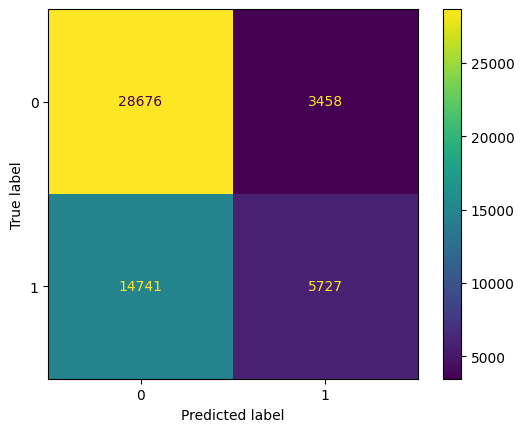

In [220]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cmrm)
disp1.plot()

## KNN (not used in final)

In [221]:

# for i in range (1,10,1):
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train,y_train)

#     knn_pred=knn.predict(x_test)
#     print(knn_pred)


#     cmknn=confusion_matrix(y_true=y_test,y_pred=knn_pred)
#     TPknn = cmknn[1][1]
#     TNknn = cmknn[0][0]
#     FPknn = cmknn[0][1]
#     FNknn = cmknn[1][0]

#     # Accuracy = (TP + TN) / All Predictions
#     knnAcc=(float (TPknn+TNknn) / float(TPknn + TNknn + FPknn + FNknn))
#     # Sensitivity = TP / (FN + TP)
#     knnSen=(TPknn / float(TPknn + FNknn))
#     # Specificity = TN / (TN + FP)
#     knnSpe=TNknn / (TNknn + FPknn)

#     print("k = "+str(i))
#     print("The Accuracy score for knn is: ")
#     print(knnAcc)
#     print("The Sensitivity score for knn is: ")
#     print(knnSen)
#     print("The Specificity score for knn is: ")
#     print(knnSpe)

## tf test (not used in final)

In [222]:
# import tensorflow as tf
# from keras import layers as klayer
# print("--Make model--")

# model = tf.keras.models.Sequential()     
# # model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(500, activation = "relu", use_bias= True))
# model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# print("--Fit model--")
# model.fit(x_train, y_train, epochs=1, verbose=1)
# print("--Evaluate model--")
# model_loss1, model_acc1 = model.evaluate(x_train,  y_train, verbose=2)
# model_loss2, model_acc2 = model.evaluate(x_test,  y_test, verbose=2)


# print(f"Train / Test Accuracy: {model_acc1*100:.1f}% / {model_acc2*100:.1f}%")

## mlp model test (not used in final)

In [224]:
# mlp = MLPClassifier(activation='relu', solver='adam', max_iter=500)
# mlp.fit(x_train,y_train)

# mlp_pred=mlp.predict(x_test)

# cmmlp=confusion_matrix(y_true=y_test,y_pred=mlp_pred)
# TPmlp = cmmlp[1][1]
# TNmlp = cmmlp[0][0]
# FPmlp = cmmlp[0][1]
# FNmlp = cmmlp[1][0]

# # Accuracy = (TP + TN) / All Predictions
# mlpAcc=(float (TPmlp+TNmlp) / float(TPmlp + TNmlp + FPmlp + FNmlp))
# # Sensitivity = TP / (FN + TP)
# mlpSen=(TPmlp / float(TPmlp + FNmlp))
# # Specificity = TN / (TN + FP)
# mlpSpe=TNmlp / (TNmlp + FPmlp)

# print("The Accuracy score for mlp is: ")
# print(mlpAcc)
# print("The Sensitivity score for mlp is: ")
# print(mlpSen)
# print("The Specificity score for mlp is: ")
# print(mlpSpe)

### Try to find best n_estimators (with number increase 10):

In [225]:
# # 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
# score_acc = []
# score_sen=[]
# score_spe=[]
# score_aver=[]


# # 每隔10步建立一个随机森林，获得不同n_estimators的得分
# for i in range(0,200,10):
#     rfc = RandomForestClassifier(n_estimators=i+1
#                                 ,max_depth=11, min_samples_leaf=3 , min_samples_split=9 ,random_state=90)
#     rfc.fit(x_train,y_train);
#     rfc_pred=rfc.predict(x_test)
#     cmrfc=confusion_matrix(y_true=y_test,y_pred=rfc_pred)
#     TPrfc = cmrfc[1][1]
#     TNrfc = cmrfc[0][0]
#     FPrfc = cmrfc[0][1]
#     FNrfc = cmrfc[1][0]

#     # Accuracy = (TP + TN) / All Predictions
#     rfcAcc=(float (TPrfc+TNrfc) / float(TPrfc + TNrfc + FPrfc + FNrfc))
#     # Sensitivity = TP / (FN + TP)
#     rfcSen=(TPrfc / float(TPrfc + FNrfc))
#     # Specificity = TN / (TN + FP)
#     rfcSpe=TNrfc / (TNrfc + FPrfc)

#     avescore=1.3*rfcAcc+rfcSen+rfcSpe
#     score_acc.append(rfcAcc)
#     score_sen.append(rfcSen)
#     score_spe.append(rfcSpe)
#     score_aver.append(avescore)

# score_accmax = max(score_acc)
# print('The Max accurate number：{}'.format(score_accmax),
#       'n_estimators：{}'.format(score_acc.index(score_accmax)*10+1))

# # 绘制学习曲线
# x = np.arange(1,201,10)
# plt.subplot(111)
# plt.plot(x, score_acc, 'r-')
# plt.show()

# score_senmax = max(score_sen)
# print('The Max sensitive number：{}'.format(score_senmax),
#       'n_estimators：{}'.format(score_sen.index(score_senmax)*10+1))

# # 绘制学习曲线
# x = np.arange(1,201,10)
# plt.subplot(111)
# plt.plot(x, score_sen, 'r-')
# plt.show()

# score_spemax = max(score_spe)
# print('The Max specific number：{}'.format(score_spemax),
#       'n_estimators：{}'.format(score_spe.index(score_spemax)*10+1))

# # 绘制学习曲线
# x = np.arange(1,201,10)
# plt.subplot(111)
# plt.plot(x, score_spe, 'r-')
# plt.show()

# score_avemax = max(score_aver)
# print('The Max average number：{}'.format(score_avemax),
#       'n_estimators：{}'.format(score_aver.index(score_avemax)*10+1))

# # 绘制学习曲线
# x = np.arange(1,201,10)
# plt.subplot(111)
# plt.plot(x, score_spe, 'r-')
# plt.show()


### Try to find best n_estimators (with number increase 1):

In [226]:
# # 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
# score_acc = []
# score_sen=[]
# score_spe=[]


# # 每隔10步建立一个随机森林，获得不同n_estimators的得分
# for i in range(45,65,1):
#     rfc = RandomForestClassifier(n_estimators=i+1
#                                 ,random_state=90)
#     rfc.fit(x_train,y_train);
#     rfc_pred=rfc.predict(x_test)
#     cmrfc=confusion_matrix(y_true=y_test,y_pred=rfc_pred)
#     TPrfc = cmrfc[1][1]
#     TNrfc = cmrfc[0][0]
#     FPrfc = cmrfc[0][1]
#     FNrfc = cmrfc[1][0]

#     # Accuracy = (TP + TN) / All Predictions
#     rfcAcc=(float (TPrfc+TNrfc) / float(TPrfc + TNrfc + FPrfc + FNrfc))
#     # Sensitivity = TP / (FN + TP)
#     rfcSen=(TPrfc / float(TPrfc + FNrfc))
#     # Specificity = TN / (TN + FP)
#     rfcSpe=TNrfc / (TNrfc + FPrfc)

#     # print("The Accuracy score for RM is: ")
#     # print(rmAcc)
#     # print("The Sensitivity score for RM is: ")
#     # print(rmSen)
#     # print("The Specificity score for RM is: ")
#     # print(rmSpe)
#     # score = cross_val_score(rfc, x_train, y_train).mean()
#     score_acc.append(rfcAcc)
#     score_sen.append(rfcSen)
#     score_spe.append(rfcSpe)

# score_accmax = max(score_acc)
# print('The Max accurate number：{}'.format(score_accmax),
#       'n_estimators：{}'.format(score_acc.index(score_accmax)+46))

# # 绘制学习曲线
# x = np.arange(46,66,1)
# plt.subplot(111)
# plt.plot(x, score_acc, 'r-')
# plt.show()

# score_senmax = max(score_sen)
# print('The Max sensitive number：{}'.format(score_senmax),
#       'n_estimators：{}'.format(score_sen.index(score_senmax)+46))

# # 绘制学习曲线
# x = np.arange(46,66,1)
# plt.subplot(111)
# plt.plot(x, score_sen, 'r-')
# plt.show()

# score_spemax = max(score_spe)
# print('The Max specific number：{}'.format(score_spemax),
#       'n_estimators：{}'.format(score_spe.index(score_spemax)+46))

# # 绘制学习曲线
# x = np.arange(46,66,1)
# plt.subplot(111)
# plt.plot(x, score_spe, 'r-')
# plt.show()
